In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import torch
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten, Activation
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
# from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,precision_score, recall_score, f1_score, precision_recall_curve, auc

import cv2
from PIL import Image

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-03-18 17:05:47.287606: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 17:05:47.287706: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 17:05:47.441588: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/emnist-a-to-j/mnsit(f).h5
/kaggle/input/emnist-a-to-j/mnsit(e).h5
/kaggle/input/emnist-a-to-j/mnsit(a).h5
/kaggle/input/emnist-a-to-j/mnsit(g).h5
/kaggle/input/emnist-a-to-j/mnsit(h).h5
/kaggle/input/emnist-a-to-j/mnsit(d).h5
/kaggle/input/emnist-a-to-j/mnsit(j).h5
/kaggle/input/emnist-a-to-j/mnsit(i).h5
/kaggle/input/emnist-a-to-j/mnsit(c).h5
/kaggle/input/emnist-a-to-j/mnsit(b).h5
/kaggle/input/nist-dataset/train_X.h5
/kaggle/input/nist-dataset/train_U.h5
/kaggle/input/nist-dataset/train_N.h5
/kaggle/input/nist-dataset/train_6.h5
/kaggle/input/nist-dataset/train_T.h5
/kaggle/input/nist-dataset/train_B.h5
/kaggle/input/nist-dataset/train_E.h5
/kaggle/input/nist-dataset/train_K.h5
/kaggle/input/nist-dataset/train_C.h5
/kaggle/input/nist-dataset/train_Q.h5
/kaggle/input/nist-dataset/train_V.h5
/kaggle/input/nist-dataset/train_2.h5
/kaggle/input/nist-dataset/train_O.h5
/kaggle/input/nist-dataset/train_5.h5
/kaggle/input/nist-dataset/train_Y.h5
/kaggle/input/nist-dataset/tra

In [2]:
import h5py
h5f = h5py.File('/kaggle/input/street-view-house-nos-h5-file/SVHN_single_grey1.h5','r')

In [3]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]
print('X_train' ,X_train.shape)
print('y_train' ,y_train.shape)
print('X_test' ,X_test.shape)
print('y_test' ,y_test.shape)
print('X_val' ,X_val.shape)
print('y_val' ,y_val.shape)

X_train (42000, 32, 32)
y_train (42000,)
X_test (18000, 32, 32)
y_test (18000,)
X_val (60000, 32, 32)
y_val (60000,)


In [4]:
x_train = np.expand_dims(X_train, axis=-1) # <--- add channel axis
x_train = x_train.astype('float32') / 255
x_val = np.expand_dims(X_val, axis=-1) # <--- add channel axis
x_val = x_val.astype('float32') /255
x_test = np.expand_dims(X_test, axis=-1) # <--- add channel axis
x_test = x_test.astype('float32') /255
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)

Shape of x_train: (42000, 32, 32, 1)
Shape of x_val: (60000, 32, 32, 1)
Shape of x_test: (18000, 32, 32, 1)


In [5]:
y_train0=keras.utils.to_categorical(y_train)
y_val0=keras.utils.to_categorical(y_val)
y_test0=keras.utils.to_categorical(y_test)

print("Shape of ytrain:",y_train0.shape)
print("Shape of yval:",y_val0.shape)
print("Shape of ytest:",y_test0.shape)

Shape of ytrain: (42000, 10)
Shape of yval: (60000, 10)
Shape of ytest: (18000, 10)


In [6]:
df_a = h5py.File('/kaggle/input/emnist-a-to-j/mnsit(a).h5','r')
df_b = h5py.File('/kaggle/input/emnist-a-to-j/mnsit(b).h5','r')
df_c = h5py.File('/kaggle/input/emnist-a-to-j/mnsit(c).h5','r')
df_d = h5py.File('/kaggle/input/emnist-a-to-j/mnsit(d).h5','r')
df_e = h5py.File('/kaggle/input/emnist-a-to-j/mnsit(e).h5','r')
df_f = h5py.File('/kaggle/input/emnist-a-to-j/mnsit(f).h5','r')
df_g = h5py.File('/kaggle/input/emnist-a-to-j/mnsit(g).h5','r')
df_h = h5py.File('/kaggle/input/emnist-a-to-j/mnsit(h).h5','r')
df_i = h5py.File('/kaggle/input/emnist-a-to-j/mnsit(i).h5','r')
df_j = h5py.File('/kaggle/input/emnist-a-to-j/mnsit(j).h5','r')

In [7]:
image_a = np.array(df_a['alphapets'])
label_a = np.array(df_a['labels'])
# print("Shape of image_a: \n",image_a.shape)
# print("Shape of label_a: \n",label_a.shape)

image_b = np.array(df_b['alphapets'])
label_b = np.array(df_b['labels'])
# print("Shape of image_b: \n",image_b.shape)
# print("Shape of label_b: \n",label_b.shape)

image_c = np.array(df_c['alphapets'])
label_c = np.array(df_c['labels'])
# print("Shape of image_c: \n",image_c.shape)
# print("Shape of label_c: \n",label_c.shape)

image_d = np.array(df_d['alphapets'])
label_d = np.array(df_d['labels'])
# print("Shape of image_d: \n",image_d.shape)
# print("Shape of label_d: \n",label_d.shape)

image_e = np.array(df_e['alphapets'])
label_e = np.array(df_e['labels'])
# print("Shape of image_e: \n",image_e.shape)
# print("Shape of label_e: \n",label_e.shape)

image_f = np.array(df_f['alphapets'])
label_f = np.array(df_f['labels'])
# print("Shape of image_f: \n",image_f.shape)
# print("Shape of label_f: \n",label_f.shape)

image_g = np.array(df_g['alphapets'])
label_g = np.array(df_g['labels'])
# print("Shape of image_g: \n",image_g.shape)
# print("Shape of label_g: \n",label_g.shape)

image_h = np.array(df_h['alphapets'])
label_h = np.array(df_h['labels'])
# print("Shape of image_h: \n",image_h.shape)
# print("Shape of label_h: \n",label_h.shape)

image_i = np.array(df_i['alphapets'])
label_i = np.array(df_i['labels'])
# print("Shape of image_i: \n",image_i.shape)
# print("Shape of label_i: \n",label_i.shape)

image_j = np.array(df_j['alphapets'])
label_j = np.array(df_j['labels'])
# print("Shape of image_j: \n",image_j.shape)
# print("Shape of label_j: \n",label_j.shape)

images = np.concatenate((image_a,image_b,image_c,image_d,image_e,image_f,image_g,image_h,image_i,image_j))
labels = np.concatenate((label_a,label_b,label_c,label_d,label_e,label_f,label_g,label_h,label_i,label_j))

# Train = np.expand_dims(train, axis=-1) # <--- add channel axis
Images = images.astype('float32') / 255
Labels = keras.utils.to_categorical(labels)
print("Shape of Images: \n",images.shape)
print("Shape of Lables: \n",labels.shape)

Shape of Images: 
 (529114, 32, 32, 1)
Shape of Lables: 
 (529114,)


In [8]:
print(label_a)
print(Labels[0])

[11 11 11 ... 11 11 11]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
print("Shape of Images: \n",Images.shape)
print("Shape of Lables: \n",Labels.shape)

Shape of Images: 
 (529114, 32, 32, 1)
Shape of Lables: 
 (529114, 21)


In [10]:
dfn_0 = h5py.File('/kaggle/input/nist-dataset/train_0.h5','r')
dfn_1 = h5py.File('/kaggle/input/nist-dataset/train_1.h5','r')
dfn_2 = h5py.File('/kaggle/input/nist-dataset/train_2.h5','r')
dfn_3 = h5py.File('/kaggle/input/nist-dataset/train_3.h5','r')
dfn_4 = h5py.File('/kaggle/input/nist-dataset/train_4.h5','r')
dfn_5 = h5py.File('/kaggle/input/nist-dataset/train_5.h5','r')
dfn_6 = h5py.File('/kaggle/input/nist-dataset/train_6.h5','r')
dfn_7 = h5py.File('/kaggle/input/nist-dataset/train_7.h5','r')
dfn_8 = h5py.File('/kaggle/input/nist-dataset/train_8.h5','r')
dfn_9 = h5py.File('/kaggle/input/nist-dataset/train_9.h5','r')
dfn_a = h5py.File('/kaggle/input/nist-dataset/train_A.h5','r')
dfn_b = h5py.File('/kaggle/input/nist-dataset/train_B.h5','r')
dfn_c = h5py.File('/kaggle/input/nist-dataset/train_C.h5','r')
dfn_d = h5py.File('/kaggle/input/nist-dataset/train_D.h5','r')
dfn_e = h5py.File('/kaggle/input/nist-dataset/train_E.h5','r')
dfn_f = h5py.File('/kaggle/input/nist-dataset/train_F.h5','r')
dfn_g = h5py.File('/kaggle/input/nist-dataset/train_G.h5','r')
dfn_h = h5py.File('/kaggle/input/nist-dataset/train_H.h5','r')
dfn_i = h5py.File('/kaggle/input/nist-dataset/train_I.h5','r')
dfn_j = h5py.File('/kaggle/input/nist-dataset/train_J.h5','r')
dfn_k = h5py.File('/kaggle/input/nist-dataset/train_K.h5','r')
dfn_l = h5py.File('/kaggle/input/nist-dataset/train_L.h5','r')
dfn_m = h5py.File('/kaggle/input/nist-dataset/train_M.h5','r')
dfn_n = h5py.File('/kaggle/input/nist-dataset/train_N.h5','r')
dfn_o = h5py.File('/kaggle/input/nist-dataset/train_O.h5','r')
dfn_p = h5py.File('/kaggle/input/nist-dataset/train_P.h5','r')
dfn_q = h5py.File('/kaggle/input/nist-dataset/train_Q.h5','r')
dfn_r = h5py.File('/kaggle/input/nist-dataset/train_R.h5','r')
dfn_s = h5py.File('/kaggle/input/nist-dataset/train_S.h5','r')
dfn_t = h5py.File('/kaggle/input/nist-dataset/train_T.h5','r')
dfn_u = h5py.File('/kaggle/input/nist-dataset/train_U.h5','r')
dfn_v = h5py.File('/kaggle/input/nist-dataset/train_V.h5','r')
dfn_w = h5py.File('/kaggle/input/nist-dataset/train_W.h5','r')
dfn_x = h5py.File('/kaggle/input/nist-dataset/train_X.h5','r')
dfn_y = h5py.File('/kaggle/input/nist-dataset/train_Y.h5','r')
dfn_z = h5py.File('/kaggle/input/nist-dataset/train_Z.h5','r')

In [11]:
imagen_a = np.array(dfn_a['alphapets'])
labeln_a = np.array(dfn_a['labels'])
# print("Shape of image_a: \n",imagen_a.shape)
# print("Shape of label_a: \n",labeln_a.shape)

imagen_b = np.array(dfn_b['alphapets'])
labeln_b = np.array(dfn_b['labels'])
# print("Shape of image_b: \n",imagen_b.shape)
# print("Shape of label_b: \n",labeln_b.shape)

imagen_c = np.array(dfn_c['alphapets'])
labeln_c = np.array(dfn_c['labels'])
# print("Shape of image_c: \n",imagen_c.shape)
# print("Shape of label_c: \n",labeln_c.shape)

imagen_d = np.array(dfn_d['alphapets'])
labeln_d = np.array(dfn_d['labels'])
# print("Shape of image_d: \n",imagen_d.shape)
# print("Shape of label_d: \n",labeln_d.shape)

imagen_e = np.array(dfn_e['alphapets'])
labeln_e = np.array(dfn_e['labels'])
# print("Shape of image_e: \n",imagen_e.shape)
# print("Shape of label_e: \n",labeln_e.shape)

imagen_f = np.array(dfn_f['alphapets'])
labeln_f = np.array(dfn_f['labels'])
# print("Shape of image_f: \n",imagen_f.shape)
# print("Shape of label_f: \n",labeln_f.shape)

imagen_g = np.array(dfn_g['alphapets'])
labeln_g = np.array(dfn_g['labels'])
# print("Shape of image_g: \n",imagen_g.shape)
# print("Shape of label_g: \n",labeln_g.shape)

imagen_h = np.array(dfn_h['alphapets'])
labeln_h = np.array(dfn_h['labels'])
# print("Shape of image_h: \n",imagen_h.shape)
# print("Shape of label_h: \n",labeln_h.shape)

imagen_i = np.array(dfn_i['alphapets'])
labeln_i = np.array(dfn_i['labels'])
# print("Shape of image_i: \n",imagen_i.shape)
# print("Shape of label_i: \n",labeln_i.shape)

imagen_j = np.array(dfn_j['alphapets'])
labeln_j = np.array(dfn_j['labels'])
# print("Shape of image_j: \n",imagen_j.shape)
# print("Shape of label_j: \n",labeln_j.shape)

imagen_k = np.array(dfn_k['alphapets'])
labeln_k = np.array(dfn_k['labels'])
# print("Shape of image_k: \n",imagen_k.shape)
# print("Shape of label_k: \n",labeln_k.shape)

imagen_l = np.array(dfn_l['alphapets'])
labeln_l = np.array(dfn_l['labels'])
# print("Shape of image_l: \n",imagen_l.shape)
# print("Shape of label_l: \n",labeln_l.shape)

imagen_m = np.array(dfn_m['alphapets'])
labeln_m = np.array(dfn_m['labels'])
# print("Shape of image_m: \n",imagen_m.shape)
# print("Shape of label_m: \n",labeln_m.shape)

imagen_n = np.array(dfn_n['alphapets'])
labeln_n = np.array(dfn_n['labels'])
# print("Shape of image_n: \n",imagen_n.shape)
# print("Shape of label_n: \n",labeln_n.shape)

imagen_o = np.array(dfn_o['alphapets'])
labeln_o = np.array(dfn_o['labels'])
# print("Shape of image_o: \n",imagen_o.shape)
# print("Shape of label_o: \n",labeln_o.shape)

imagen_p = np.array(dfn_p['alphapets'])
labeln_p = np.array(dfn_p['labels'])
# print("Shape of image_p: \n",imagen_p.shape)
# print("Shape of label_p: \n",labeln_p.shape)

imagen_q = np.array(dfn_q['alphapets'])
labeln_q = np.array(dfn_q['labels'])
# print("Shape of image_q: \n",imagen_q.shape)
# print("Shape of label_q: \n",labeln_q.shape)

imagen_r = np.array(dfn_r['alphapets'])
labeln_r = np.array(dfn_r['labels'])
# print("Shape of image_r: \n",imagen_r.shape)
# print("Shape of label_r: \n",labeln_r.shape)

imagen_s = np.array(dfn_s['alphapets'])
labeln_s = np.array(dfn_s['labels'])
# print("Shape of image_s: \n",imagen_s.shape)
# print("Shape of label_s: \n",labeln_s.shape)

imagen_t = np.array(dfn_t['alphapets'])
labeln_t = np.array(dfn_t['labels'])
# print("Shape of image_t: \n",imagen_t.shape)
# print("Shape of label_t: \n",labeln_t.shape)

imagen_u = np.array(dfn_u['alphapets'])
labeln_u = np.array(dfn_u['labels'])
# print("Shape of image_u: \n",imagen_u.shape)
# print("Shape of label_u: \n",labeln_u.shape)

imagen_v = np.array(dfn_v['alphapets'])
labeln_v = np.array(dfn_v['labels'])
# print("Shape of image_v: \n",imagen_v.shape)
# print("Shape of label_v: \n",labeln_v.shape)

imagen_w = np.array(dfn_w['alphapets'])
labeln_w = np.array(dfn_w['labels'])
# print("Shape of image_w: \n",imagen_w.shape)
# print("Shape of label_w: \n",labeln_w.shape)

imagen_x = np.array(dfn_x['alphapets'])
labeln_x = np.array(dfn_x['labels'])
# print("Shape of image_x: \n",imagen_x.shape)
# print("Shape of label_x: \n",labeln_x.shape)

imagen_y = np.array(dfn_y['alphapets'])
labeln_y = np.array(dfn_y['labels'])
# print("Shape of image_y: \n",imagen_y.shape)
# print("Shape of label_y: \n",labeln_y.shape)

imagen_z = np.array(dfn_z['alphapets'])
labeln_z = np.array(dfn_z['labels'])
# print("Shape of image_z: \n",imagen_z.shape)
# print("Shape of label_z: \n",labeln_z.shape)


imagesn = np.concatenate((imagen_a,imagen_b,imagen_c,imagen_d,imagen_e,imagen_f,imagen_g,imagen_h,imagen_i,imagen_j,imagen_k,imagen_l,imagen_m,imagen_n,imagen_o,imagen_p,imagen_q,imagen_r,imagen_s,imagen_t,imagen_u,imagen_v,imagen_w,imagen_x,imagen_y,imagen_z))
labelsn = np.concatenate((labeln_a,labeln_b,labeln_c,labeln_d,labeln_e,labeln_f,labeln_g,labeln_h,labeln_i,labeln_j,labeln_k,labeln_l,labeln_m,labeln_n,labeln_o,labeln_p,labeln_q,labeln_r,labeln_s,labeln_t,labeln_u,labeln_v,labeln_w,labeln_x,labeln_y,labeln_z))

# Train = np.expand_dims(train, axis=-1) # <--- add channel axis
Imagesn = imagesn.astype('float32') / 255
Labelsn = keras.utils.to_categorical(labelsn)
print("Shape of Images: \n",imagesn.shape)
print("Shape of Lables: \n",labelsn.shape)

Shape of Images: 
 (203626, 32, 32, 1)
Shape of Lables: 
 (203626,)


In [12]:
print(labeln_a)
print(Labelsn[0])

[11 11 11 ... 11 11 11]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
print("Shape of Images: \n",Imagesn.shape)
print("Shape of Lables: \n",Labelsn.shape)

Shape of Images: 
 (203626, 32, 32, 1)
Shape of Lables: 
 (203626, 37)


In [14]:
from sklearn.model_selection import train_test_split
img_train, img_temp, lab_train, lab_temp = train_test_split(images, labels, test_size=0.3, random_state=5)
img_val, img_test, lab_val, lab_test = train_test_split(img_temp, lab_temp, test_size=0.5, random_state=42)
img_train1, img_temp1, lab_train1, lab_temp1 = train_test_split(imagesn, labelsn, test_size=0.3, random_state=5)
img_val1, img_test1, lab_val1, lab_test1 = train_test_split(img_temp1, lab_temp1, test_size=0.5, random_state=42)

In [15]:
print("Shape of img_train:",img_train.shape)
print("Shape of img_val:",img_val.shape)
print("Shape of img_test:",img_test.shape)
print("Shape of lab_train:",lab_train.shape)
print("Shape of lab_val:",lab_val.shape)
print("Shape of lab_test:",lab_test.shape)

Shape of img_train: (370379, 32, 32, 1)
Shape of img_val: (79367, 32, 32, 1)
Shape of img_test: (79368, 32, 32, 1)
Shape of lab_train: (370379,)
Shape of lab_val: (79367,)
Shape of lab_test: (79368,)


In [16]:
print("Shape of img_train1:",img_train1.shape)
print("Shape of img_val1:",img_val1.shape)
print("Shape of img_test1:",img_test1.shape)
print("Shape of lab_train1:",lab_train1.shape)
print("Shape of lab_val1:",lab_val1.shape)
print("Shape of lab_test1:",lab_test1.shape)

Shape of img_train1: (142538, 32, 32, 1)
Shape of img_val1: (30544, 32, 32, 1)
Shape of img_test1: (30544, 32, 32, 1)
Shape of lab_train1: (142538,)
Shape of lab_val1: (30544,)
Shape of lab_test1: (30544,)


In [17]:
new_x_train = np.concatenate((x_train,img_train,img_train1))
new_x_test = np.concatenate((x_test,img_test,img_test1))
new_x_val = np.concatenate((x_val,img_val,img_val1))
print("Shape of x_train:",new_x_train.shape)
print("Shape of x_val:",new_x_val.shape)
print("Shape of x_test:",new_x_test.shape)

Shape of x_train: (554917, 32, 32, 1)
Shape of x_val: (169911, 32, 32, 1)
Shape of x_test: (127912, 32, 32, 1)


In [18]:
new_y_train = np.concatenate((y_train,lab_train,lab_train1))
new_y_test = np.concatenate((y_test,lab_test,lab_test1))
new_y_val = np.concatenate((y_val,lab_val,lab_val1))
new_y_train=keras.utils.to_categorical(new_y_train)
new_y_val=keras.utils.to_categorical(new_y_val)
new_y_test=keras.utils.to_categorical(new_y_test)
print("Shape of x_train:",new_y_train.shape)
print("Shape of x_val:",new_y_val.shape)
print("Shape of x_test:",new_y_test.shape)

Shape of x_train: (554917, 37)
Shape of x_val: (169911, 37)
Shape of x_test: (127912, 37)


In [21]:
model1 = Sequential()

# Add convolutional layers
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1) ))
model1.add(MaxPooling2D((2, 2)))
# Add hidden layers
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the convolutional layer
model1.add(MaxPooling2D((2, 2)))
# Add hidden layers
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the convolutional layer
model1.add(MaxPooling2D((2, 2)))

# Add Flatten layers
model1.add(Flatten())
model1.add(Dropout(0.3))

# Add dense layers
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the dense layer

# Add dense layers
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization()) # Add BatchNormalization layer after the dense layer
model1.add(Dropout(0.2))

# Add the output layer
model1.add(Dense(37, activation='softmax'))

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history1 = model1.fit(x=new_x_train, y=new_y_train,
                   validation_data=(new_x_val, new_y_val),
                   epochs=20,
                   verbose=1)

Epoch 1/20
   50/17342 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.1275 - loss: 3.6850   

I0000 00:00:1710782108.213063     110 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


17342/17342 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - accuracy: 0.7490 - loss: 0.8576 - val_accuracy: 0.8479 - val_loss: 0.4856
Epoch 2/20
17342/17342 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.8714 - loss: 0.4259 - val_accuracy: 0.8764 - val_loss: 0.4024
Epoch 3/20
17342/17342 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.8834 - loss: 0.3881 - val_accuracy: 0.8904 - val_loss: 0.3574
Epoch 4/20
17342/17342 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.8905 - loss: 0.3641 - val_accuracy: 0.8894 - val_loss: 0.3599
Epoch 5/20
17342/17342 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.8946 - loss: 0.3513 - val_accuracy: 0.8941 - val_loss: 0.3416
Epoch 6/20
17342/17342 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.8990 - loss: 0.3372 - val_accuracy: 0.9030 - val_loss: 0.3223
Epoch 7/20
17342/17342 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.9006 - loss: 0.3318 - val_accuracy: 0.8995 - val_loss: 0.3262
Epoch 8/20
17342/17342 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - accuracy: 0.9025 - lo

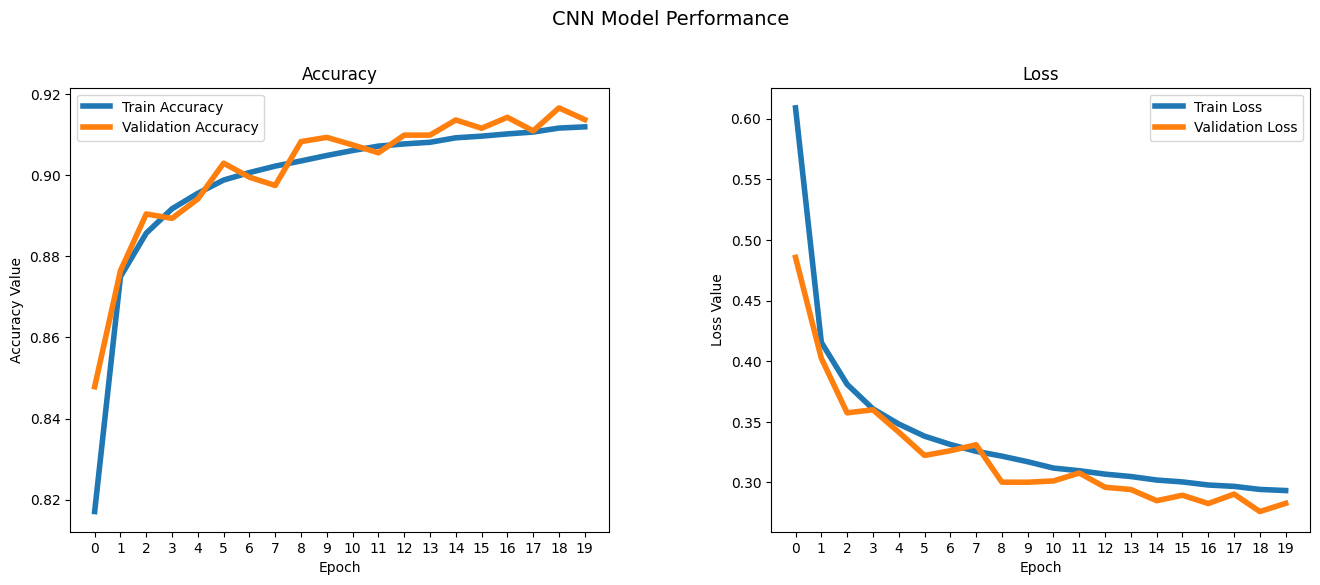

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
title = fig.suptitle('CNN Model Performance', fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history1.history['accuracy'], label='Train Accuracy', linewidth=4)
ax1.plot(epoch_list, history1.history['val_accuracy'], label='Validation Accuracy', linewidth=4)
ax1.set_xticks(np.arange(0, 20))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')

l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history1.history['loss'], label='Train Loss',linewidth=4)
ax2.plot(epoch_list, history1.history['val_loss'], label='Validation Loss',linewidth=4)
ax2.set_xticks(np.arange(0, 20))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [25]:
model1_scores = model1.evaluate(new_x_test, new_y_test)
print("TEST SET: %s: %.2f%%" % (model1.metrics_names[1], model1_scores[1]*100))

3998/3998 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9009 - loss: 0.3213
TEST SET: compile_metrics: 92.25%


In [26]:
def plot_images(img,labels,nrows,ncols,pred_labels=None):
    fig = plt.figure(figsize = (25,10))
    axes = fig.subplots(nrows,ncols)
    for i, ax in enumerate(axes.flat):
        ax.imshow(img[i])
        ax.set_xticks([]); ax.set_yticks([])
        if pred_labels is None:
            ax.set_title('True: {}'.format(labels[i]))
        else:
            ax.set_title('True: {0}, Pred: {1}'.format(labels[i], np.argmax(pred_labels[i])))

test_predictions = model1.predict(new_x_test)


3998/3998 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


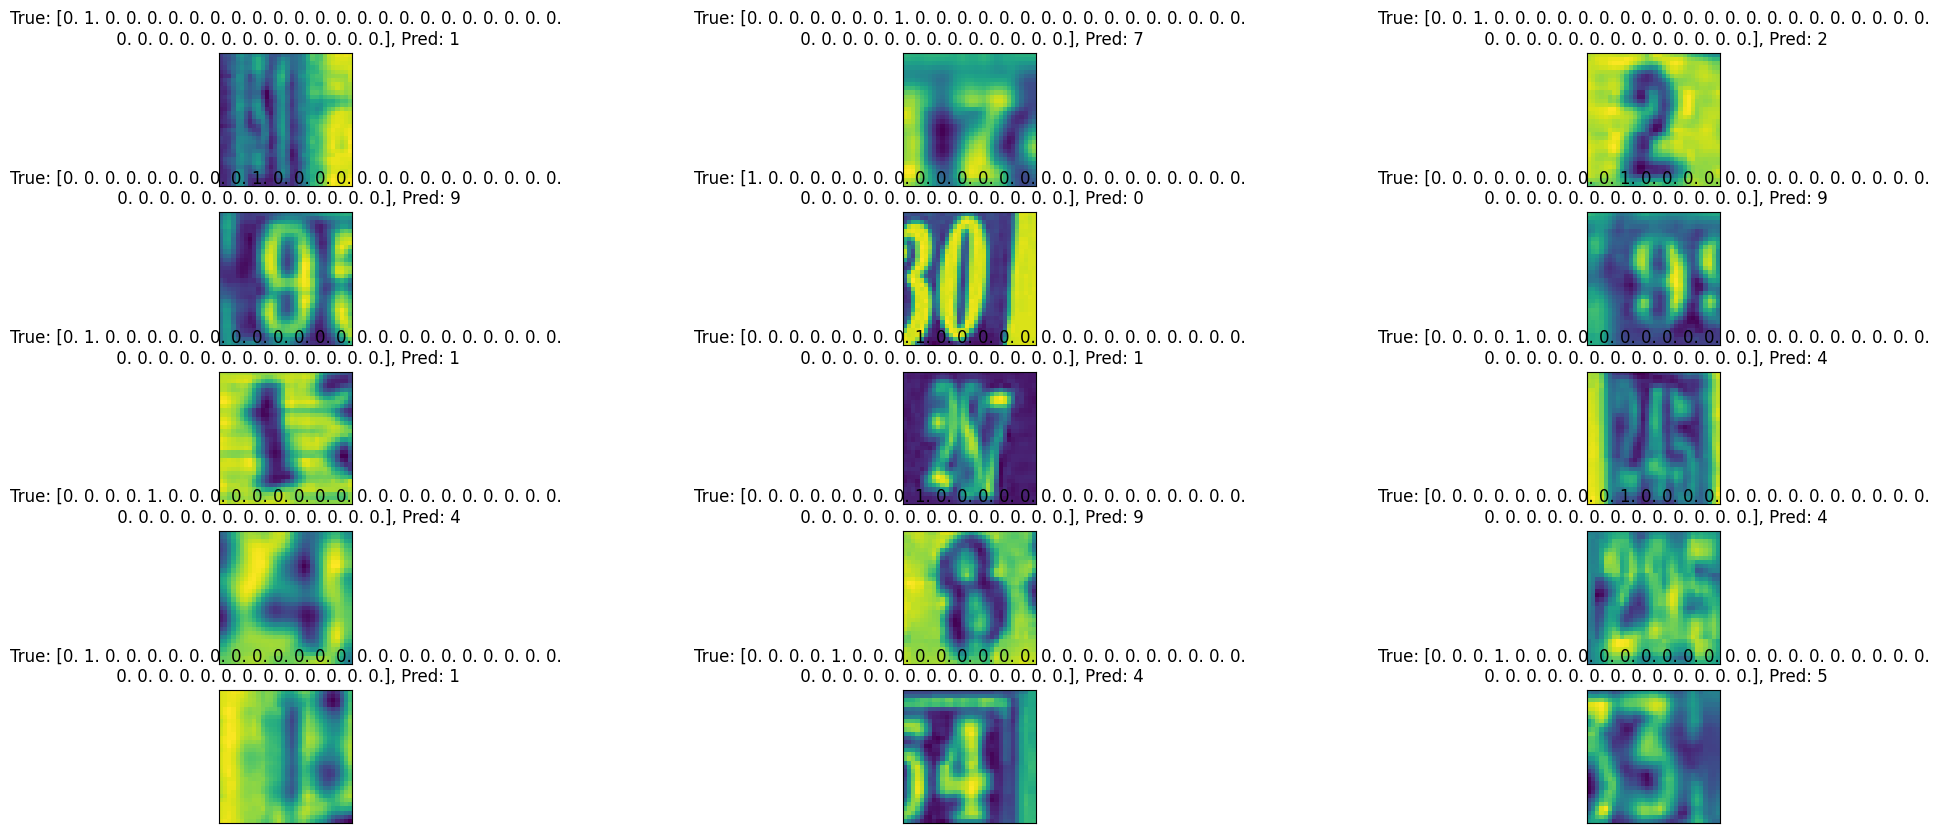

In [27]:
plot_images(new_x_test, new_y_test, 5, 3, test_predictions)

2481/2481 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


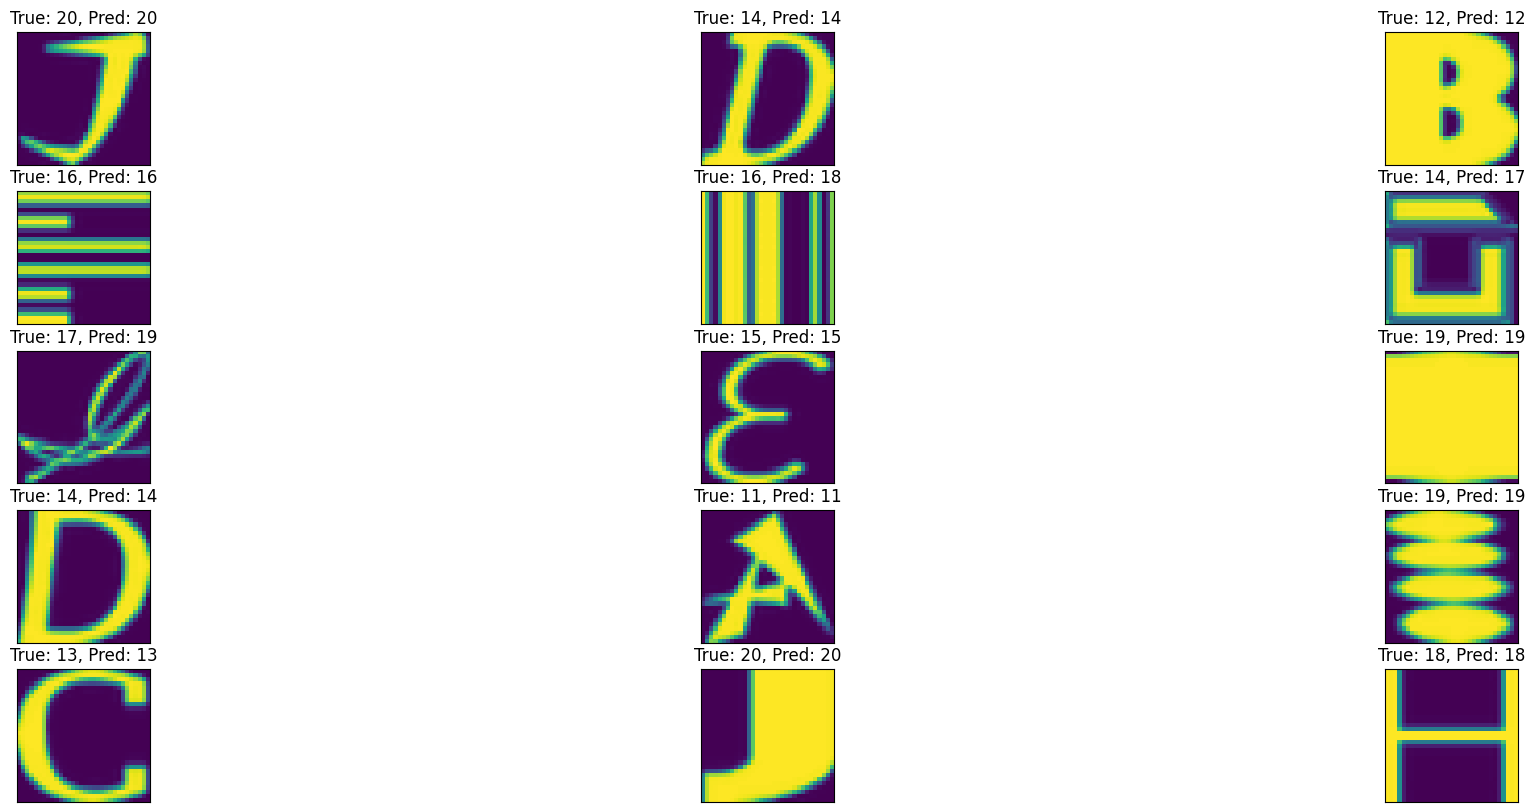

In [28]:
test_prediction1 = model1.predict(img_test)
plot_images(img_test, lab_test, 5, 3, test_prediction1)

In [29]:
model1.save("/kaggle/working/model_a_to_z.h5")

In [31]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('/kaggle/working/model_a_to_z.h5')
# summarize model.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 37)             │         4,773 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,759 (229.53 KB)

 Trainable params: 58,181 (227.27 KB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 2 (12.00 B)